In [1]:
import scanpy as sc
import loompy as lp
import numpy as np
import pandas as pd
import torch
from scipy import sparse

In [2]:
import sys; sys.path.append("/home/shhsu/download/scClass")
import scClass
from scClass.main import Model

In [3]:
def dataset(file):
    return"../../../../scClass_dataset/human_thymic_development/"+file

path_h5ad  = dataset('thymic_selected.h5ad')
path_label = dataset('thymic_anno.npy')
path_sf    = dataset('thymic_scran_sf.csv')

## Matrix Preparation

In [4]:
# more detail is on proprocessing_human_thymic_development
adata = sc.read_h5ad(path_h5ad)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [80]:
print('about',adata.shape[1],'gene, ',(adata.X.sum(axis=0)>0).sum(),'has been found in reference')

about 45468 gene,  41495 has been found in reference


## Label Preparation

In [211]:
trans_table = np.array([
['B_memory',2],
['B_naive',3],
['B_plasma',4],
['B_pro/pre',5],
['CD4+T',0],
['CD4+Tmem',0],
['CD8+T',1],
['CD8+Tmem',1],
['CD8αα',1],
['DC1',11],
['DC2',11],
['DN',-1],
['DP',-1],
['ETP',-1],
['Endo',-1],
['Ery',8],
['Fb_1',-1],
['Fb_2',-1],
['Fb_cycling',-1],
['ILC3',-2],
['Lymph',-2],
['Mac',-2],
['Mast',-2],
['Mgk',9],
['Mono',10],
['NK',7],
['NKT',-2],
['NMP',-2],
['T(agonist)',-2],
['TEC(myo)',-1],
['TEC(neuro)',-1],
['Treg',0],
['VSMC',-1],
['aDC',11],
['cTEC',-1],
['mTEC(I)',-1],
['mTEC(II)',-1],
['mTEC(III)',-1],
['mTEC(IV)',-1],
['mcTEC',-1],
['pDC',11],
['αβT(entry)',-2],
['γδT',-2]])

In [212]:
anno = adata.obs['anno']
label = scClass.get_type_id(anno,trans_table)
label_y,label2 = np.unique(anno,return_inverse=True)

## Post Preparation

In [7]:
## 1.Transmodel(gene seq)
pass # since gene seq on hca data are the same 
## 2.(1)Normalize by scran
# sf = pd.read_csv(path_sf)
# adata2.X = scClass.norm_by_scran_sf(adata,sf)
## 2.(2)Simple normalization
adata2 = scClass.normalize_simple(adata)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## Classify

In [217]:
model = scClass.load(scClass.data_dir+'model_train_drop.pkl')

loading model from:  /home/shhsu/download/scClass/scClass/data/model_train_drop.pkl


0% 15% 30% 46% 61% 77% 92% 

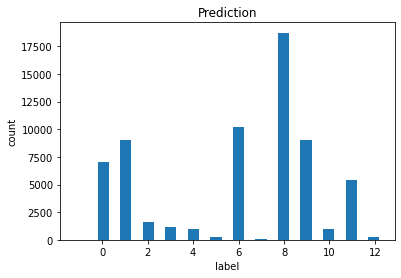

In [33]:
scClass.main.threshold=[-100]*13
y_pred = scClass.predict_batch(adata2,model,batch_size=10_000)

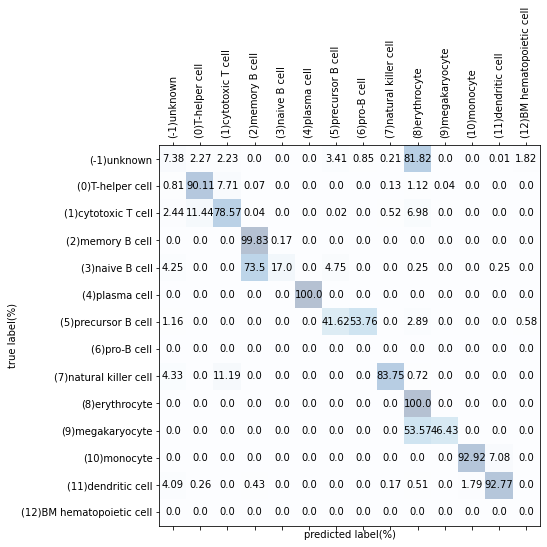

In [14]:
scClass.confusion_matrix(y_pred=y_pred,y_true=label,_filter=False)

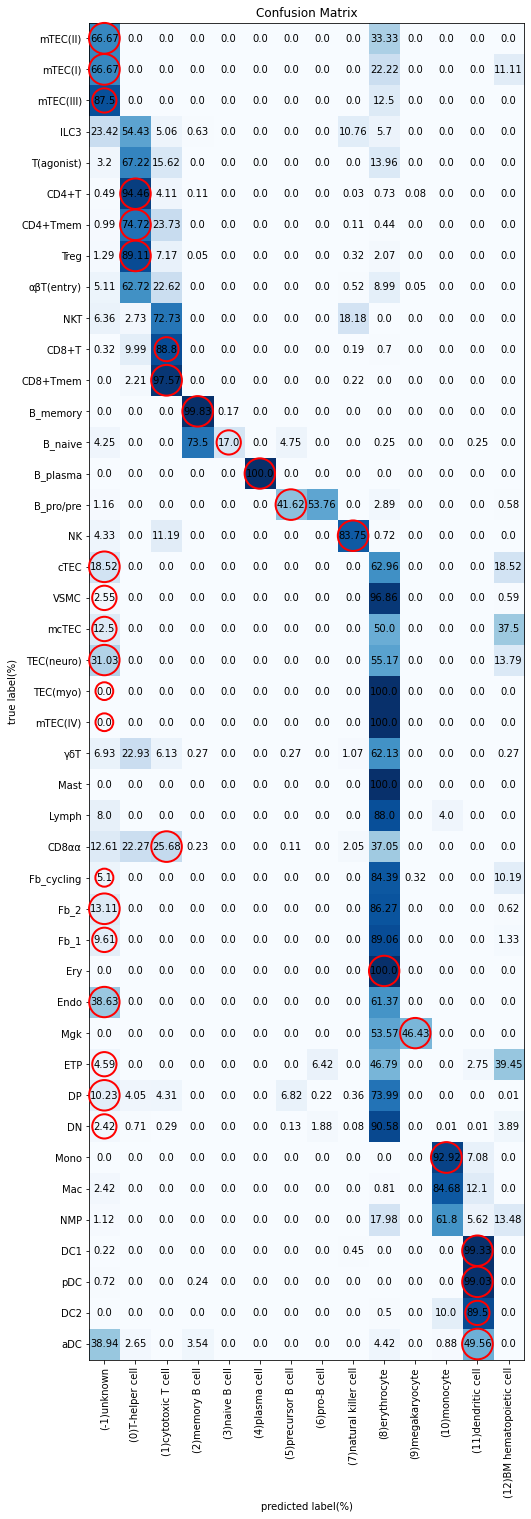

In [15]:
scClass.heatmap_matrix(y_pred=y_pred,y_true=label2,label_y=label_y,table=trans_table)